In [32]:
import pandas as pd
import numpy as np
import plotly.graph_objects as go
from textblob import TextBlob
from plotly.subplots import make_subplots

In [33]:
biden = pd.read_csv(r"C:\Users\bhuvp\Downloads\archive (11)\Bidenall2.csv")
trump = pd.read_csv(r"C:\Users\bhuvp\Downloads\archive (11)\Trumpall2.csv")

In [34]:
print(biden.shape)
print(trump.shape)

(2540, 2)
(2788, 2)


In [35]:
biden['text'][10]

'@JoeBiden Voter ID is required otherwise you Democrats will cheat..its been proven.  Have some integrity !'

In [36]:
np.sign(TextBlob(biden['text'][1]).sentiment.polarity)

0.0

In [37]:
def find_sentiment(text):
    text_nature = np.sign(TextBlob(text).sentiment.polarity)
    return 'Positive' if text_nature==1.0 else 'Nuteral' if text_nature==0.0 else 'Negative'

In [38]:
biden['Sentiment'] = biden['text'].apply(find_sentiment)
trump['Sentiment'] = trump['text'].apply(find_sentiment)

In [39]:
find_sentiment(biden['text'][1])

'Nuteral'

In [40]:
biden

,user,text,Sentiment
0,MarkHodder3,@JoeBiden And we’ll find out who won in 2026...,Nuteral
1,K87327961G,@JoeBiden Your Democratic Nazi Party cannot be...,Nuteral
2,OldlaceA,@JoeBiden So did Lying Barr,Nuteral
3,penblogger,@JoeBiden It's clear you didnt compose this tw...,Positive
4,Aquarian0264,@JoeBiden I will vote in person thank you.,Nuteral
...,...,...,...
2535,meryn1977,@JoeBiden You'll just try to calm those waters...,Positive
2536,BSNelson114,@JoeBiden 96 days 96 dias #VoteJoeBiden2020 #...,Nuteral
2537,KenCapel,@JoeBiden YOU THINK YOU CAN DO THAT??? YOU CAN...,Nuteral
2538,LeslyeHale,@JoeBiden Trump wants our children back at sch...,Positive


In [41]:
trump

,user,text,Sentiment
0,manny_rosen,@sanofi please tell us how many shares the Cr...,Positive
1,osi_abdul,"https://t.co/atM98CpqF7 Like, comment, RT #P...",Nuteral
2,Patsyrw,Your AG Barr is as useless &amp; corrupt as y...,Negative
3,seyedebrahimi_m,Mr. Trump! Wake Up! Most of the comments bel...,Positive
4,James09254677,After 4 years you think you would have figure...,Nuteral
...,...,...,...
2783,4diva63,"@realDonaldTrump For the 1/100 time, absentee ...",Nuteral
2784,hidge826,@realDonaldTrump If you’re so scared of losing...,Nuteral
2785,SpencerRossy,@realDonaldTrump I rarely get involved with fo...,Positive
2786,ScoobyMcpherson,@realDonaldTrump This is the moment when Trump...,Nuteral


In [42]:
trump_data = trump[~(trump['Sentiment']=='Nuteral')]

In [43]:
biden_data = biden[~(biden['Sentiment']=='Nuteral')]

In [44]:
trump_data.reset_index(inplace=True,drop=True)

In [47]:
biden_data.reset_index(inplace=True,drop=True)

In [46]:
trump_data

,user,text,Sentiment
0,manny_rosen,@sanofi please tell us how many shares the Cr...,Positive
1,Patsyrw,Your AG Barr is as useless &amp; corrupt as y...,Negative
2,seyedebrahimi_m,Mr. Trump! Wake Up! Most of the comments bel...,Positive
3,curtiswhitworth,Really? My prices have gone up. That’s a fact.,Positive
4,CantStandya2018,How much on stocks have you made pushing mira...,Positive
...,...,...,...
1319,MickyLafferty,"@realDonaldTrump Yeah, you're definitely afrai...",Negative
1320,connor182010,@realDonaldTrump Oh is little baby scared to b...,Negative
1321,Crystal60151335,@realDonaldTrump Absolutely!,Positive
1322,SpencerRossy,@realDonaldTrump I rarely get involved with fo...,Positive


In [48]:
biden_data

,user,text,Sentiment
0,penblogger,@JoeBiden It's clear you didnt compose this tw...,Positive
1,FabrizioBenass4,@JoeBiden #ALL LIVES MATTER #HUMAN RIGHTS HELP...,Positive
2,candyisyummy333,@JoeBiden My standard reply to propaganda: htt...,Negative
3,5h0rtie,@JoeBiden @richardmarx Trouble is trump voted ...,Negative
4,shut_up_stewart,@JoeBiden I honestly cannot comprehend how a c...,Positive
...,...,...,...
1026,Gypsy0112,@JoeBiden The only you can do to calm the wat...,Positive
1027,virgil_merchant,@JoeBiden fire is the last thing our country n...,Positive
1028,meryn1977,@JoeBiden You'll just try to calm those waters...,Positive
1029,LeslyeHale,@JoeBiden Trump wants our children back at sch...,Positive


In [53]:
trump_count = trump_data.groupby(['Sentiment']).count()
biden_count = biden_data.groupby(['Sentiment']).count()

In [60]:
trump_count

,user,text
Sentiment,,
Negative,597,597
Positive,727,727


In [63]:
trump_neg = trump_count['text'][0]*100/trump_data.shape[0]
trump_pos = trump_count['text'][1]*100/trump_data.shape[0]
biden_neg = biden_count['text'][0]*100/biden_data.shape[0]
biden_pos = biden_count['text'][1]*100/biden_data.shape[0]

C:\Users\bhuvp\AppData\Local\Temp\ipykernel_2860\15559986.py:1: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  trump_neg = trump_count['text'][0]*100/trump_data.shape[0]
C:\Users\bhuvp\AppData\Local\Temp\ipykernel_2860\15559986.py:2: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  trump_pos = trump_count['text'][1]*100/trump_data.shape[0]
C:\Users\bhuvp\AppData\Local\Temp\ipykernel_2860\15559986.py:3: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.i

In [56]:
trump_count

,user,text
Sentiment,,
Negative,597,597
Positive,727,727


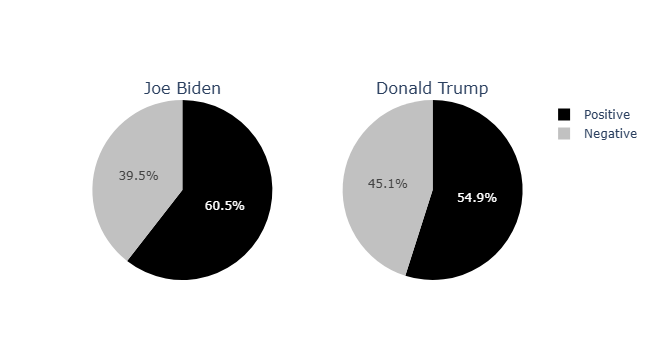

In [72]:
Politician = ['Joe Biden','Donald Trump']
neg_data = [biden_neg,trump_neg]
pos_data = [biden_pos,trump_pos]
fig = make_subplots(rows=1,cols=2,specs=[[{'type':'domain'},{'type':'domain'}]],subplot_titles=Politician)
fig.add_trace(go.Pie(name='Negative',labels=['Positive','Negative'],marker=dict(colors=['#000000','#C1C1C1']),values=[pos_data[0],neg_data[0]]),row=1,col=1)
fig.add_trace(go.Pie(name='Positive',labels=['Positive','Negative'],marker=dict(colors=['#000000','#C1C1C1']),values=[pos_data[1],neg_data[1]]),row=1,col=2)

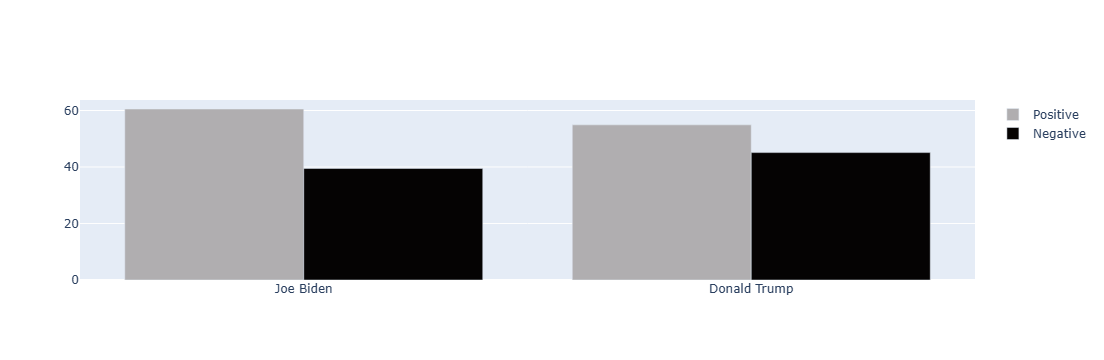

In [80]:
Politician = ['Joe Biden','Donald Trump']
neg_data = [biden_neg,trump_neg]
pos_data = [biden_pos,trump_pos]

fig = go.Figure(
    data = [
        go.Bar(name='Positive',x=Politician,y=pos_data,marker=dict(color=['#b0aeb0','#b0aeb0'])),
        go.Bar(name='Negative',x=Politician,y=neg_data,marker=dict(color=['#050303','#050303']))
    ]
)
fig.update_layout(barmode='group')
fig.show()